In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox

In [2]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

In [4]:
df_general = pd.DataFrame(columns=["test accuracy", "number of sampled points", "latent size"])

results_path = r"C:\Users\pinar\OneDrive\Masaüstü\masterthesis\src\results\mnist_vanillavae_dbal"
LATENT_DIMS = [2, 4, 8, 16, 64, 256, 512]
for exp_iter in range(3):
    for latent_dim in LATENT_DIMS:
        acc, dataset_size = np.load(os.path.join(results_path, "{func_name}_latent_dim_{latent_dim}_exp_{exp_iter}.npy".format(func_name="max_entropy", exp_iter=exp_iter, latent_dim=latent_dim)))
        df = pd.DataFrame({"test accuracy": acc[0:99], "number of sampled points": dataset_size.astype(int)[0:99]})
        df["latent size"] = latent_dim
        df["test accuracy"] = df['test accuracy'].rolling(window=10).mean()
        
        df_general = df_general.append(df)

In [5]:
my_palette = []

In [6]:
for i in range(len(LATENT_DIMS)-1, -1, -1):
    my_palette.append(sns.color_palette("pastel", n_colors=len(LATENT_DIMS))[i])

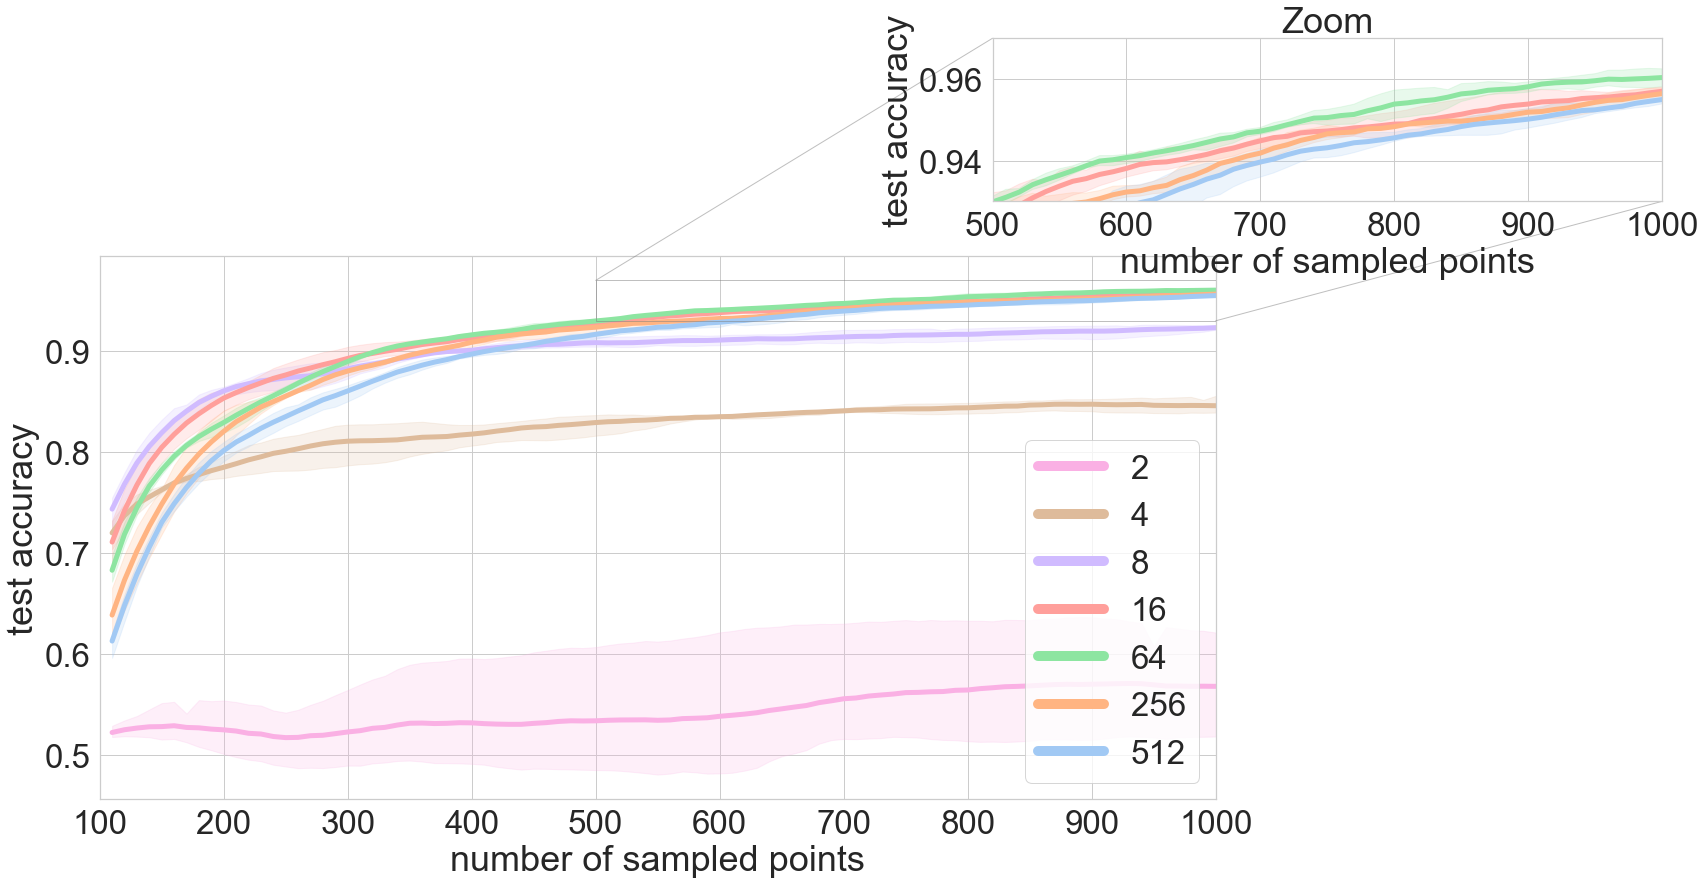

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

df_general = df_general.reset_index().drop(columns=['index'])
sns.lineplot(data=df_general, x="number of sampled points", y="test accuracy", hue="latent size", legend="full", palette=my_palette, ax=ax, linewidth=5.0)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(10)
ax.set_xlim([100, 1000])

ax2 = ax.inset_axes([0.8, 1.1, .6, .3])
sns.lineplot(data=df_general, x="number of sampled points", y="test accuracy", hue="latent size", legend=False, palette=my_palette, ax=ax2, linewidth = 5.0)
ax2.set_title('Zoom')
ax2.set_ylim([0.93,0.97])
ax2.set_xlim([500, 1000])

ax.indicate_inset_zoom(ax2)
plt.savefig("latent_size_comparison.pdf", bbox_inches=Bbox([[0.0, 0.0], [25, 13]]))
plt.show()